In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets
from datetime import datetime
import statsmodels.api as sm

In [34]:
# importing datasets
# replace urls with your local download paths
matches_url = "/Users/williamtjw/Downloads/BA Take home assigment/BA Take home assigment/Intern_2023_July_matches.xlsx"
unmatched_crm_url = "/Users/williamtjw/Downloads/BA Take home assigment/BA Take home assigment/Intern_2023_July_unmatched_crm.xlsx"
unmatched_wav_url = "/Users/williamtjw/Downloads/BA Take home assigment/BA Take home assigment/Intern_2023_July_unmatched_wav.xlsx"

matches = pd.read_excel(matches_url)
unmatched_crm = pd.read_excel(unmatched_crm_url)
unmatched_wav = pd.read_excel(unmatched_wav_url)

In [35]:
# Viewing datasets' info
separation = '-' * 50
print(matches.info(), '\n',separation , '\n')
print(unmatched_crm.info(), '\n', separation, '\n')
print(unmatched_wav.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   11808 non-null  int64  
 1   CRM_Hotline                  11808 non-null  object 
 2   CRM_Agent ID                 8924 non-null   float64
 3   CRM_Date                     11808 non-null  object 
 4   CRM_Call Received At (h:mm)  11808 non-null  object 
 5   CRM_Call Ended At (h:mm)     11808 non-null  object 
 6   Audio_File_Name              11808 non-null  object 
 7   Audio_File_Duration(s)       11808 non-null  float64
 8   Audio_XML_LocalStartTime     11808 non-null  object 
 9   Audio_XML_LocalEndTime       11808 non-null  object 
 10  Audio_XML_Date               11808 non-null  object 
 11  Call_Duration                11808 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.1+ MB
None 
 ----------

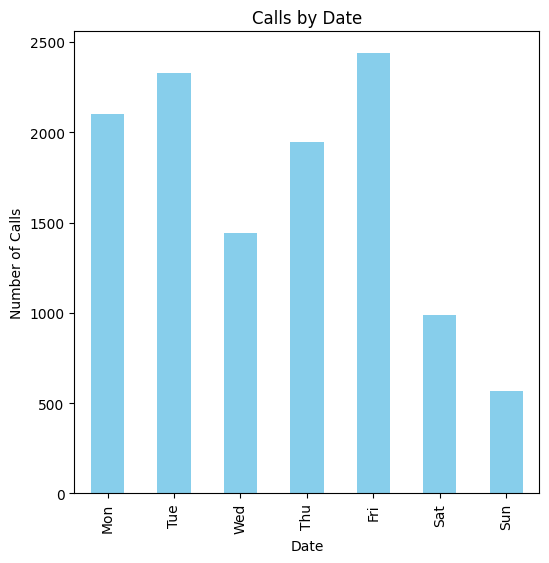

In [48]:
# to identify peak call durations during certain periods
# BY DAY
df = matches.copy()


# Convert 'CRM_Date' to datetime format and standardize date format
df['CRM_Date'] = pd.to_datetime(df['CRM_Date'], format='mixed')
df["day_of_week"] = df["CRM_Date"].dt.strftime("%a")

# Count the number of calls per date and sort in chronological order
call_counts = df['day_of_week'].value_counts().sort_index()

# Define the order of days of the week
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Count the number of calls per day of the week and sort in the defined order
call_counts = df['day_of_week'].value_counts().reindex(days_order)
# Plotting the frequency distribution of calls by date
plt.figure(figsize=(6, 6))
call_counts.plot(kind='bar', color='skyblue')
plt.title('Calls by Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

In [51]:
# BY HOUR
# using tableau

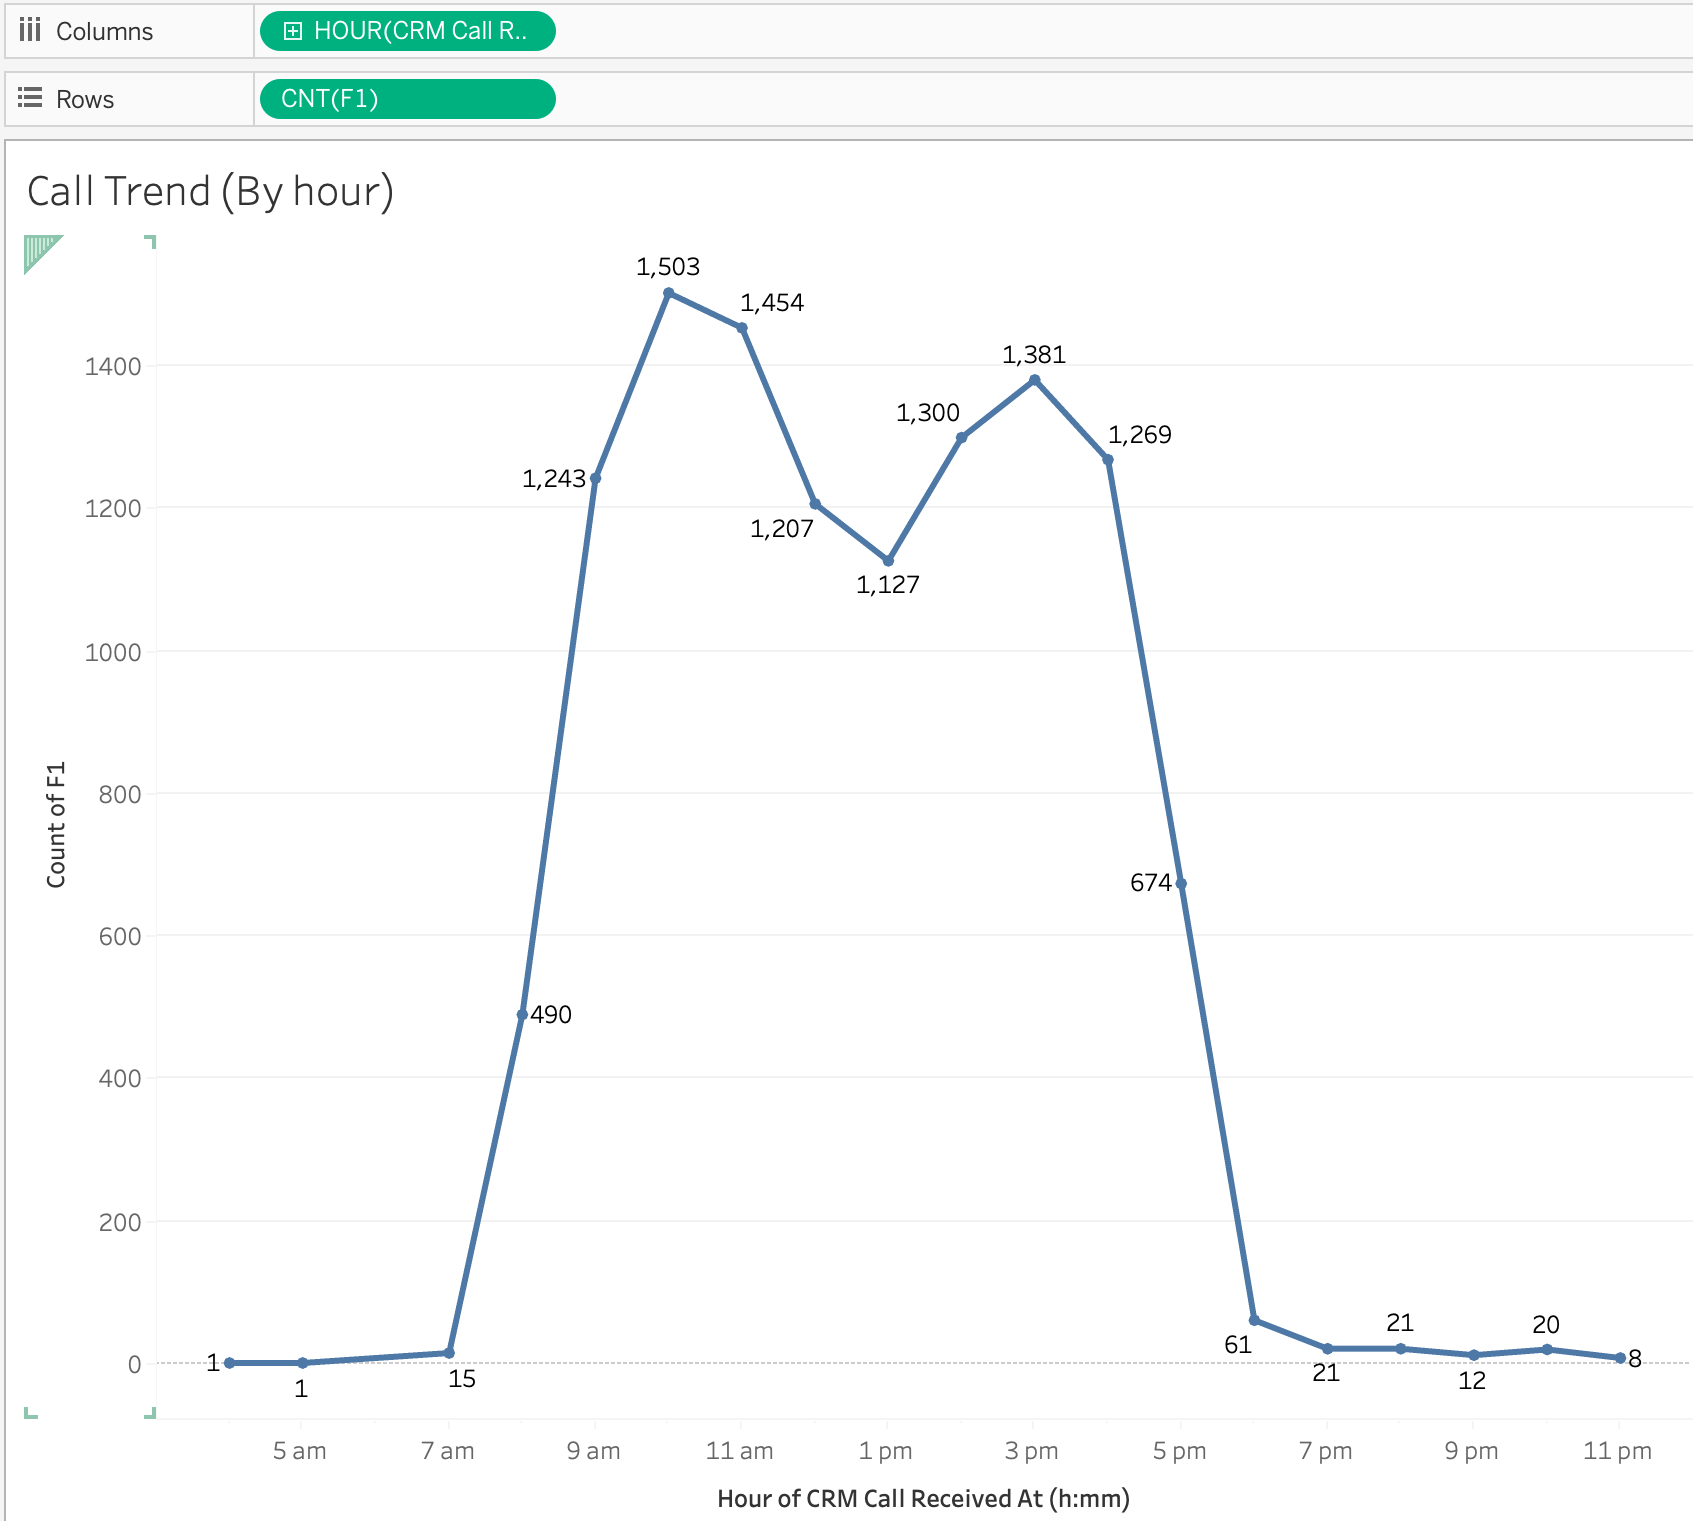

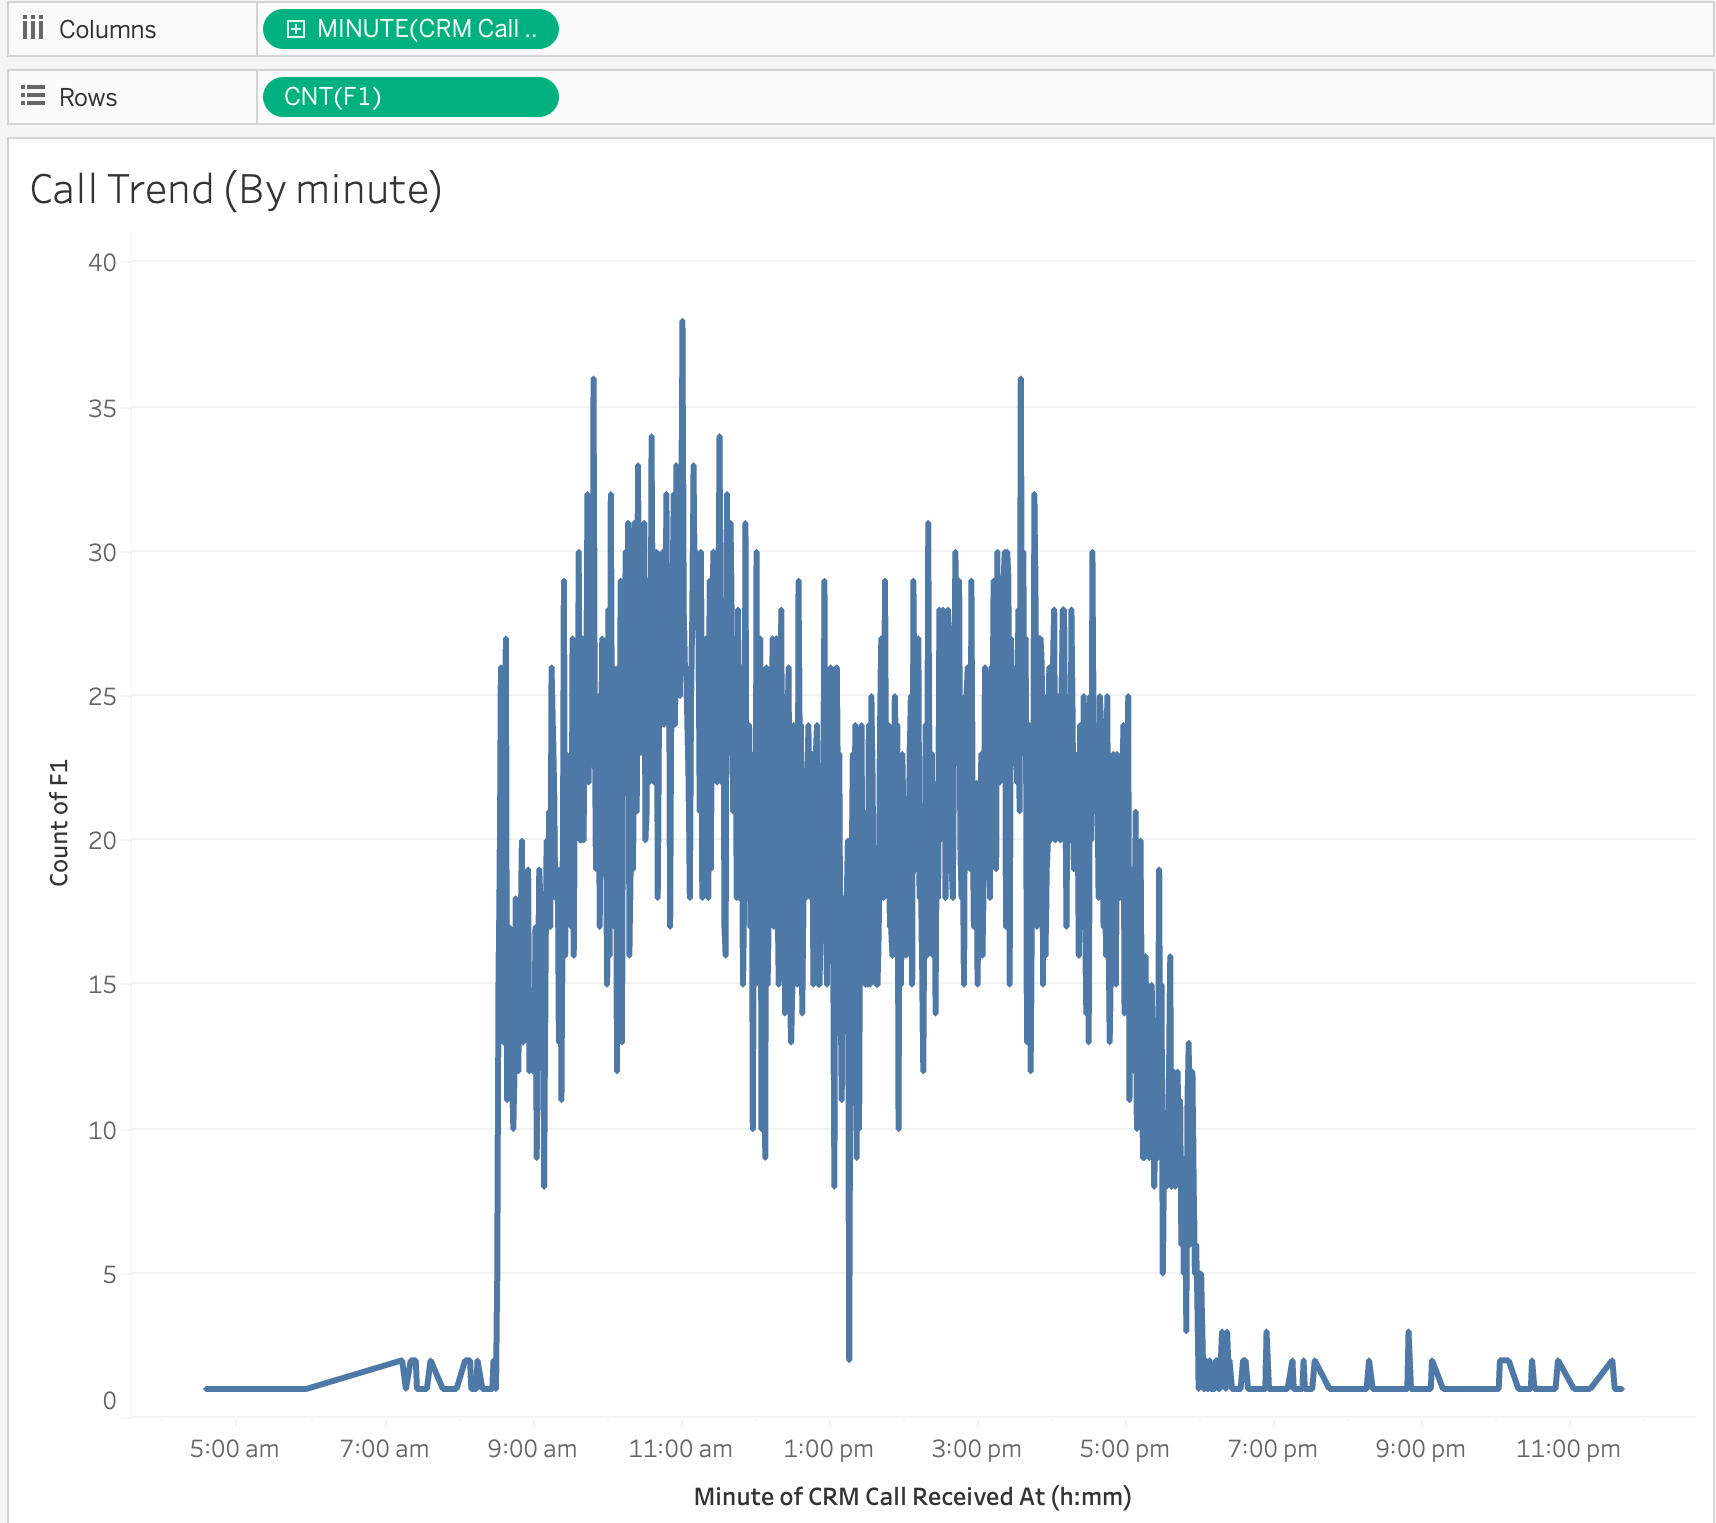

<p>
    Maintain computing resources throughout the work week; can opt to increase computing capacity on Fridays when calls seem to concentrate the most.
</p>
<p>
    Within each day, computing resources should begin to scale up before opening hours (8am), maintained at high capacity between the peak period (10am - 4pm), and scaled down approaching closing hours (6pm)
</p>

<b>
Reflection of the challenges and solutions, learning points from this task>

- During attempts at data cleaning, date and duration formats were difficult to standardize. I had moderate success employing relevant python libraries for data analysis (e.g. Pandas)
- I was unable to do data grouping (due to unknown errors related to the value formats). Alternatively, I used Tableau to aggregate and summarise the call data rather than doing it programmatically since the task only required an intuitive presentation regardless of the backend work. However, matplotlib is still useful to create visualisations
- Time constraints: Conflicts with school projects hindered further analysis, resulting in superificial results

- Learning points: 
    - Format Handling: ensuring standardized date formats (e.g. dd-mm-yyyy)
    - Aggregating Data: experimenting in grouping and summarising data to obtain meaningful visuals from the large call datasets
    - Data Visualisation: attempted using Tableau and matplotlib to provide effective visuals for general stakeholder communication